# Import Libraries

In [1]:
import os, random
import ntpath
import SimpleITK
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import pickle
import math
from sklearn.model_selection import StratifiedShuffleSplit
import gc 

# Load Dataset

In [2]:
# Loading data from pickle:
data = pd.read_pickle("train-data-filelist.pkl")

# Load Label Indices

In [3]:
patch_indices = pickle.load(open("patch_indices.p","rb"))

In [4]:
# fc_indices are the fissure complete label indices
# fi_indices are the fissure incomplete label indices
fc_indices, fi_indices = patch_indices

# Training and validation set 

In [5]:
labels = data['label'].values

In [6]:
splitter = StratifiedShuffleSplit(1, test_size=0.1)

In [7]:
'''for train_index, test_index in splitter.split(data, data['label'].values):
    train_data = data.loc[train_index]
    validation_data = data.loc[test_index]'''

train_data = data[:80]
validation_data = data[80:100]

In [8]:
train_data

,fissuremask,image,label,lungmask,name,completeness
0,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a06,52.0410
1,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a13,69.0858
2,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a00,20.2700
3,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a15,70.1147
4,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a21,76.2946
5,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a03,39.0370
6,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a19,75.0080
7,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a27,79.3114
8,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a25,77.9893
9,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a16,71.3789


In [9]:
validation_data

,fissuremask,image,label,lungmask,name,completeness
80,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c12,99.8988
81,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c31,100.0000
82,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c18,100.0000
83,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c38,100.0000
84,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c15,99.9803
85,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c20,100.0000
86,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c14,99.9444
87,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c43,100.0000
88,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c10,99.8726
89,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,c00,99.0007


# Help Functions

In [10]:
def readImg(img_path):
    img = SimpleITK.ReadImage(img_path)
    img_array = SimpleITK.GetArrayFromImage(img)
    return img_array

In [11]:
def show_image(img, msk, lbl):
    matplotlib.rcParams['figure.figsize'] = (20, 12)
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title('RGB image')
    plt.subplot(1,3,2)
    plt.imshow(msk)
    plt.title('Lung mask')
    plt.subplot(1,3,3)
    plt.imshow(lbl)
    plt.title('Fissure mask')
    plt.show()

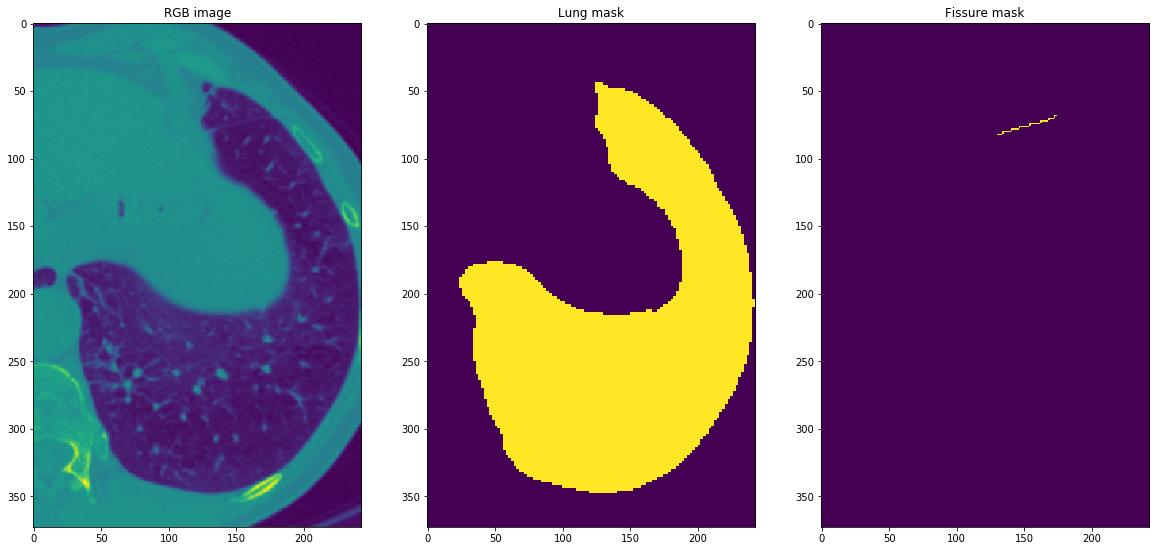

In [12]:
img = readImg(data['image'][4])[100,:,:]
msk = readImg(data['lungmask'][4])[100,:,:]
lbl = readImg(data['fissuremask'][4])[100,:,:]
show_image(img, msk, lbl)

# Patch Generator

In [13]:
'''
PatchExtractor: class used to extract and possibly augment patches from images.
'''

class PatchExtractor:
    
    def __init__(self, patch_size):
        self.patch_size = patch_size
        self.i = 0 
        
    def get_patch(self, image, location):
        '''
        image: a numpy array representing the input image
        location: a tuple with an z, y, and x coordinate
        
        return a 3D patch from the image at 'location', representing the center of the patch
        '''
        
        z, y, x = location
        c, h, w = self.patch_size
        
        patch = np.zeros(shape=(c,h,w,1))
        
        try:
            patch = image[int(z-(c/2)):int(z+(c/2)),int(y-(h/2)):int(y+(h/2)),int(x-(w/2)):int(x+(w/2))]
        except:
            print("Patch out of boundary, please make sure that the patch location is not out of boundary.")
        return patch

# Batch Creator

In [14]:
class BatchCreator:
    
    def __init__(self,patch_extractor,dataset,patch_indices,batch_division):
        self.patch_extractor = patch_extractor
        self.patch_size = self.patch_extractor.patch_size
        
        self.img_list = dataset['image'].values
        self.lbl_list = dataset['fissuremask'].values
        self.msk_list = dataset['lungmask'].values
        
        self.a_indices = dataset.index[dataset['label'] == "a"].tolist()
        self.b_indices = dataset.index[dataset['label'] == "b"].tolist()
        self.c_indices = dataset.index[dataset['label'] == "c"].tolist()
        
        self.img_indices = self.a_indices + self.b_indices + self.c_indices
        
        self.fc_indices = patch_indices[0]
        self.fi_indices = patch_indices[1]
        
        self.batch_division = batch_division
        
        self.examined_images = []
        
    def create_batch(self, batch_size):
        
        if len(self.examined_images) == len(self.a_indices + self.b_indices + self.c_indices):
            self.examined_images = []
            self.img_indices = self.a_indices + self.b_indices + self.c_indices
            
        img_index, list_index = self.pickImage()
        
        x_data, y_data, fissure_data = self.initializeOutputArrays(batch_size)
        
        fc_slices_dict = self.fc_indices[img_index]
        fi_slices_dict = self.fi_indices[img_index]
        
        img_array, lbl_array, msk_array = self.img2array(img_index)
        
        (fc_nr,fi_nr) = self.batch_division
        b_nr = batch_size-(fc_nr+fi_nr)
        
        if len(list(fi_slices_dict.keys())) == 0:
            fc_nr = fc_nr + fi_nr
            fi_nr = 0
            
        fc_grid, fc_grid_size = self.fissureGrid(fc_slices_dict)
        fi_grid, fi_grid_size = self.fissureGrid(fi_slices_dict)
        b_grid, b_grid_dict, b_grid_size = self.backgroundGrid(img_array.shape,int(b_nr/4))
            
        background_counter = 0
        background_index = 0
        
        for i in range(batch_size):
            if i < fc_nr:
                z = fc_grid[i%fc_grid_size]
                (z,y,x) = self.getCoordinates(fc_slices_dict,z,img_array)
                if (z,y,x) != (-1,-1,-1):
                    x_data[i] = self.patch_extractor.get_patch(img_array,(z,y,x))
                    y_data[i,0,0,0,2] = 1
                    fissure_data[i] = self.patch_extractor.get_patch(lbl_array,(z,y,x))
            elif ((i >= fc_nr) and (i < (fc_nr + fi_nr))):
                z = fi_grid[i%fi_grid_size]
                (z,y,x) = self.getCoordinates(fi_slices_dict,z,img_array)
                if (z,y,x) != (-1,-1,-1):
                    x_data[i] = self.patch_extractor.get_patch(img_array,(z,y,x))
                    y_data[i,0,0,0,1] = 1
                    fissure_data[i] = self.patch_extractor.get_patch(lbl_array,(z,y,x))
            else:
                if background_counter == 4:
                    background_index += 1
                    background_counter = 0
                z = b_grid[background_index]
                grid = b_grid_dict[z][background_counter]
                (z,y,x) = self.getBackground(grid,msk_array,z)
                x_data[i] = self.patch_extractor.get_patch(img_array,(z,y,x))
                y_data[i,0,0,0,0] = 1
                fissure_data[i] = self.patch_extractor.get_patch(lbl_array,(z,y,x))
                background_counter += 1
        
        self.examined_images.append(img_index)
        
        return x_data, y_data
    
    def pickImage(self):
        index = np.random.randint(0,len(self.img_indices)-1)
        img_index = self.img_indices[index]
        self.examined_images.append(img_index)
        self.img_indices = np.delete(self.img_indices,index)
        return img_index, index
    
    def initializeOutputArrays(self, batch_size):
        # patch array
        x_data = np.zeros((batch_size, *self.patch_extractor.patch_size, 1))
        # label array (one-hot structure)
        y_data = np.zeros((batch_size, 1, 1, 1, 3)) 
        # fissure mask patch array
        fissure_data = np.zeros((batch_size, *self.patch_extractor.patch_size, 1))
        
        return x_data, y_data, fissure_data
    
    def img2array(self, img_index):
        # compute numpy array from image
        img_path = self.img_list[img_index]
        img_array = readImg(img_path)
        img_array = np.expand_dims(img_array, 3)
        
        # compute numpy array from fissure mask
        lbl_path = self.lbl_list[img_index]
        lbl_array = readImg(lbl_path)
        lbl_array = np.expand_dims(lbl_array, 3)
        
        # compute numpy array from lung mask
        msk_path = self.msk_list[img_index]
        msk_array = readImg(msk_path)
        msk_array = np.expand_dims(msk_array, 3)
        
        return img_array, lbl_array, msk_array
    
    def fissureGrid(self,slicesDict):
        z_size, _, _ = self.patch_extractor.patch_size
        slices = sorted(list(slicesDict.keys()))
        z_grid = list(self.chunks(slices,int(z_size*1.5)))
        z_medians = [int(np.median(chunk)) for chunk in z_grid]
        grid_size = len(z_medians)
        return z_medians, grid_size
    
    def backgroundGrid(self,img_shape,b_nr):
        z_max, y_max, x_max, _ = img_shape
        z_size, y_size, x_size = self.patch_extractor.patch_size
        slices = list(range(z_max))
        z_grid = list(self.chunks(slices,int(len(slices)/b_nr)))
        z_medians = [int(np.median(chunk)) for chunk in z_grid]
        grid_size = len(z_medians)
        z_grid_dict = {}
        for z_median in z_medians:
            grid1 = (0+math.ceil(y_size/2),int(y_max/2)-1,0+math.ceil(x_size/2),int(x_max/2)-1)
            grid2 = (0+math.ceil(y_size/2),int(y_max/2)-1,int(x_max/2),(x_max-1)-(math.floor(y_size/2)))
            grid3 = (int(y_max/2),(y_max-1)-(math.floor(y_size/2)),0+math.ceil(x_size/2),int(x_max/2)-1)
            grid4 = (int(y_max/2),(y_max-1)-(math.floor(y_size/2)),int(x_max/2),(x_max-1)-(math.floor(y_size/2)))
            z_grid_dict[z_median] = (grid1,grid2,grid3,grid4)
        return z_medians, z_grid_dict, grid_size
        
    def chunks(self,l,n):
        return [l[i:i + n] for i in range(0, len(l), n)]
    
    def getCoordinates(self,slices_dict,z,img_array):
        if z == 117 or z == 295: 
            return (-1,-1,-1)
        coordinates = slices_dict[z]
        filtered_coordinates = [(y,x) for (y,x) in coordinates if self.inBoundary((z,y,x),img_array.shape)]
        if len(filtered_coordinates) == 0:
            print("Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind")
            return (-1,-1,-1)
        random_coords_index = np.random.choice(len(filtered_coordinates))
        y, x = filtered_coordinates[random_coords_index]
        return (z,y,x)
        
    
    def getBackground(self,grid,msk_array,z):
        (y_min,y_max,x_min,x_max) = grid
        y_indices, x_indices, _ = np.where(msk_array[z,:,:] == 3)
        coords = self.getCoords(z,y_indices,x_indices,msk_array)
        i = np.random.randint(len(coords)-1)
        (y,x) = coords[i]
        return (z,y,x)
    
    def getCoords(self,z,y_indices,x_indices,msk_array):
        coords = []
        for i, y in enumerate(y_indices):
            x = x_indices[i]
            coord = (y,x)
            if self.inBoundary((z,y,x),msk_array.shape):
                coords.append(coord)
        return coords
        
    def inBoundary(self,location, img_shape):
        _, y_size, x_size, _ = img_shape
        _, y_patch, x_patch = self.patch_extractor.patch_size
        
        y_min = math.ceil(0+(y_patch/2))
        y_max = math.floor(y_size-(y_patch/2))
        
        x_min = math.ceil(0+(x_patch/2))
        x_max = math.ceil(x_size-(x_patch/2))
        
        _, y, x = location
        
        if (y <= y_max and y >= y_min) and (x <= x_max and x >= x_min):
            return True
        else:
            return False
        
    def checkBackground(self,location,lbl_array,msk_array):
        z, y, x = location
        if (lbl_array[z,y,x] == 0) and (msk_array[z,y,x] == 3):
            return True
        else:
            return False
        
    def get_generator(self, batch_size):
        '''returns a generator that will yield batches infinitely'''
        while True:
            yield self.create_batch(batch_size)
        

# Example Setup

In [15]:
patch_size = (64,64,64)
output_shape = (20,20,20)
patch_extractor = PatchExtractor(patch_size)
batch_size = 16
batch_division = (6,6)#(np.ceil(batch_size/2),np.ceil(batch_size/2))

In [16]:
batch_creator = BatchCreator(patch_extractor, train_data, patch_indices, batch_division)

In [17]:
x, y = batch_creator.create_batch(batch_size)

# Convolution Network

In [18]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, Activation, BatchNormalization, Dropout
from keras import optimizers
from keras.optimizers import SGD, Adam
from keras import backend as K
import keras.callbacks
from keras import regularizers

Using TensorFlow backend.


In [19]:
x_in = Input(batch_shape=(None, None, None, None, 1)) 

x = Conv3D(32, 4)(x_in)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv3D(32, 3, activation='relu')(x)
x = MaxPooling3D(pool_size=(2, 2, 2))(x)
x = Dropout(0.25)(x)

x = Conv3D(64, 3)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv3D(64, 3, activation='relu')(x)
x = MaxPooling3D(pool_size=(2, 2, 2))(x)
x = Dropout(0.25)(x)

x = Conv3D(128, 3)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv3D(64, 1, activation='relu')(x)
x = Conv3D(3, 1)(x)
x = Dropout(0.25)(x)

x_out = Activation('softmax')(x)

## Compile model

In [20]:
model = Model(x_in, x_out)

'''def loss_function(y_true, y_pred):
    
    # calculate the log-loss 
    loss = - K.mean(K.log(K.sum(y_true * y_pred, axis = -1)))
    
    return loss'''

# define the optimizer. For the initial experiments we will use SGD, later you can try to improve upon this
learning_rate = 0.01
optimizer_sgd = SGD(lr=learning_rate, momentum=0.9, decay = 0.0001)
optimizer_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# uncomment if you wish to skip implementing your own cost-function
loss_function = 'categorical_crossentropy'
model.compile(optimizer_sgd, loss_function)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, None,  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, None, None, None,  2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, None,  128       
_________________________________________________________________
activation_1 (Activation)    (None, None, None, None,  0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, None, None, None,  27680     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, None, None, None,  0         
_________________________________________________________________
dropout_1 (Dropout)          (None, None, None, None,  0         
__________

## Training model

In [52]:
patch_size = (25,25,25)
stride=4
batch_size = 32
steps_per_epoch = 60
epochs = 20
batch_division = (8,8)

In [53]:
patch_extractor = PatchExtractor(patch_size)
batch_creator = BatchCreator(patch_extractor, train_data, patch_indices, batch_division)
train_generator = batch_creator.get_generator(batch_size)

In [54]:
model.fit_generator(generator=train_generator,
                      steps_per_epoch=steps_per_epoch, 
                      epochs=epochs)

Epoch 1/20
22/60 [==========>...................] - ETA: 1:10 - loss: 1.0086Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
34/60 [================>.............] - ETA: 49s - loss: 0.9727Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in m

60/60 [==============================] - 109s 2s/step - loss: 0.6981
Epoch 11/20
 2/60 [>.............................] - ETA: 1:52 - loss: 0.5509Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
50/60 [========================>.....] - ETA: 18s - loss: 0.6588Error: no x,y coordina

23/60 [==========>...................] - ETA: 1:04 - loss: 0.6308Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
49/60 [=======================>......] - ETA: 19s - loss: 0.5992Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: no x,y coordinates found that are in boundary of the image taking the patch size in mind
Error: 

In [55]:
list_val = []
for i in range(len(validation_data)):
    i = i+80
    # compute numpy array from image
    img_path = validation_data['image'][i]
    img_array = readImg(img_path)
    img_array = np.expand_dims(img_array, 3)

    '''# compute numpy array from fissure mask
    lbl_path = validation_data['fissuremask'][i]
    lbl_array = readImg(lbl_path)
    lbl_array = np.expand_dims(lbl_array, 3)

    # compute numpy array from lung mask
    msk_path = validation_data['lungmask'][i]
    msk_array = readImg(msk_path)
    msk_array = np.expand_dims(msk_array, 3)
    
    img = np.array([img_array, lbl_array, msk_array])'''
    
    list_val.append(img_array)
    
print(len(list_val))

20


In [56]:
def process_basic(model, dataset, stride=1):
    
    imgs = np.array(dataset)
    # apply our model to the images
    outputs = []
    for i in range(len(imgs)):
        img_tmp = np.expand_dims(imgs[i], 0)
        img_tmp = img_tmp[:,20:500,20:250,20:167,:]
        print(img_tmp.shape)
        output = model.predict(img_tmp, batch_size=1)[:,:,:,:,1]
        print(output.shape)
        outputs.append(output)

    return outputs

In [57]:
gc.collect()
output = process_basic(model, list_val)
gc.collect()

(1, 480, 225, 147, 1)
(1, 114, 51, 31)
(1, 402, 219, 147, 1)
(1, 95, 49, 31)
(1, 480, 230, 147, 1)
(1, 114, 52, 31)
(1, 480, 230, 147, 1)
(1, 114, 52, 31)
(1, 480, 230, 147, 1)
(1, 114, 52, 31)
(1, 480, 230, 147, 1)
(1, 114, 52, 31)
(1, 387, 230, 147, 1)
(1, 91, 52, 31)
(1, 480, 230, 147, 1)
(1, 114, 52, 31)
(1, 446, 230, 147, 1)
(1, 106, 52, 31)
(1, 363, 230, 147, 1)
(1, 85, 52, 31)
(1, 402, 230, 147, 1)
(1, 95, 52, 31)
(1, 480, 230, 147, 1)
(1, 114, 52, 31)
(1, 480, 230, 147, 1)
(1, 114, 52, 31)
(1, 480, 223, 141, 1)
(1, 114, 50, 30)
(1, 480, 230, 147, 1)
(1, 114, 52, 31)
(1, 480, 230, 147, 1)
(1, 114, 52, 31)
(1, 479, 230, 147, 1)
(1, 114, 52, 31)
(1, 480, 223, 147, 1)
(1, 114, 50, 31)
(1, 358, 230, 147, 1)
(1, 84, 52, 31)
(1, 388, 230, 147, 1)
(1, 91, 52, 31)


0

Completeness:  99.8988


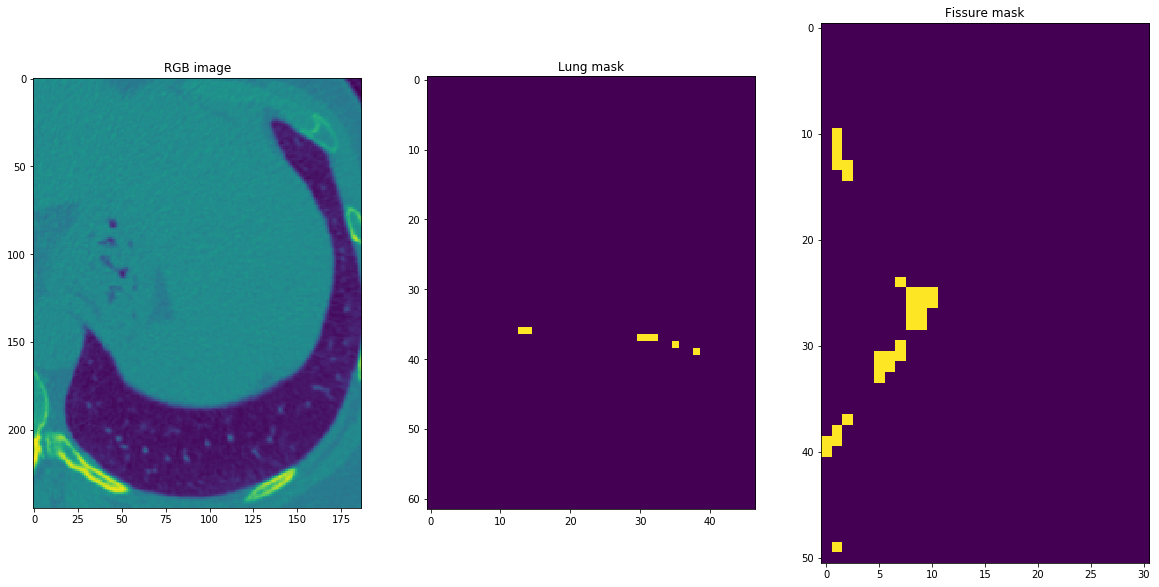

Completeness:  100.0


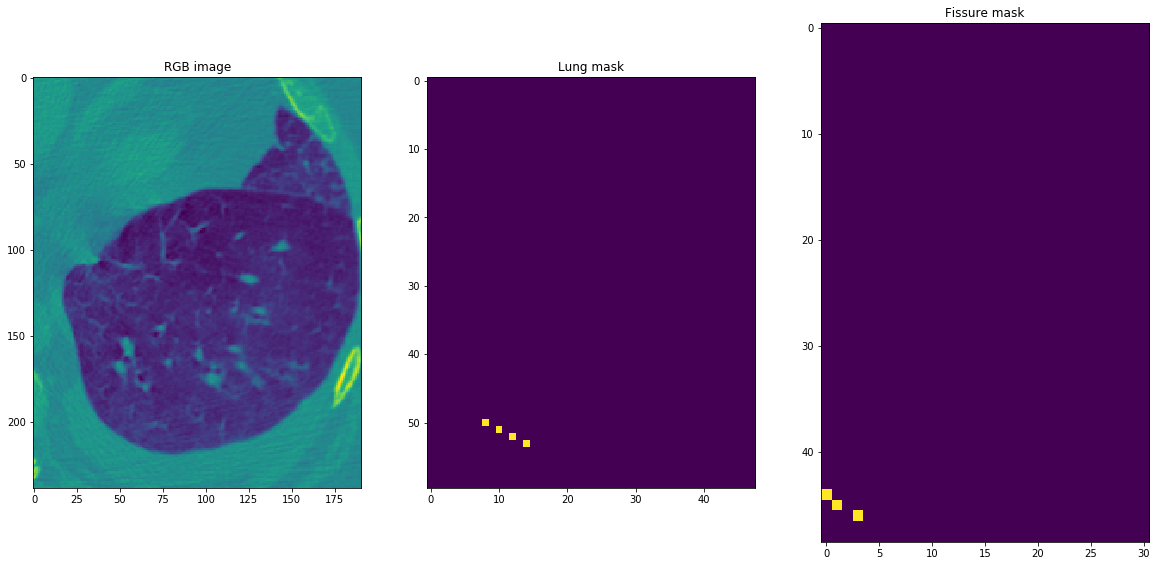

Completeness:  100.0


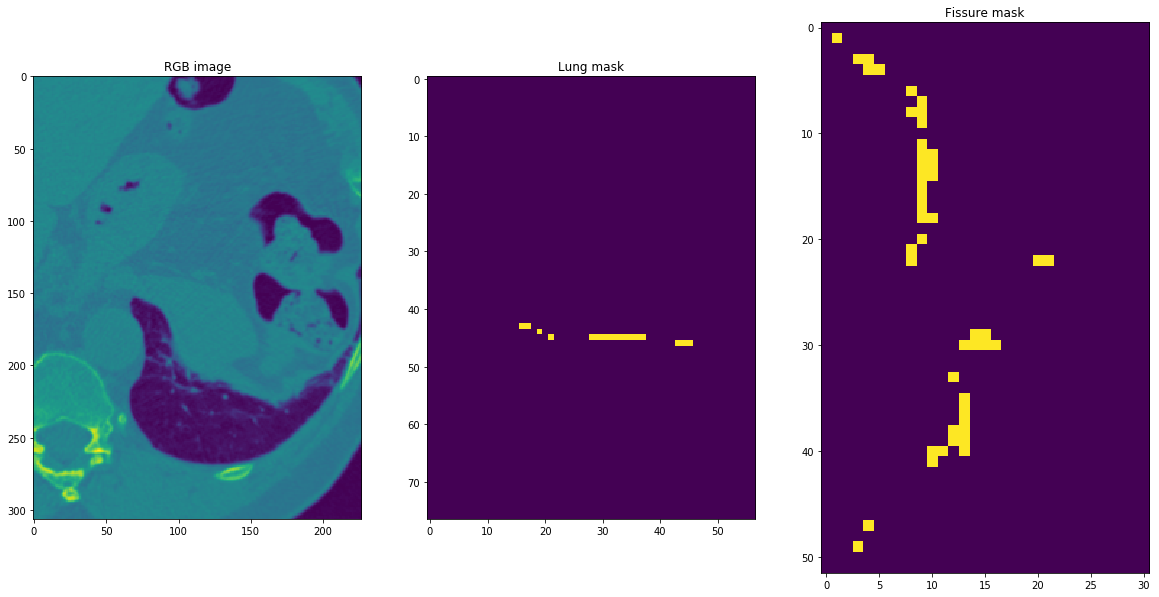

Completeness:  100.0


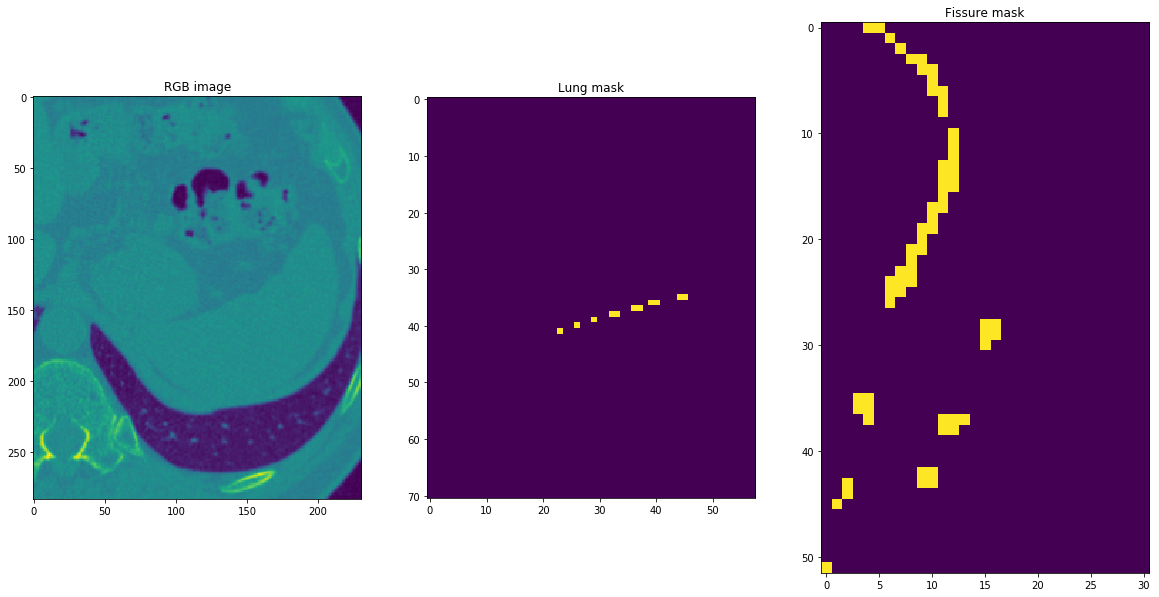

Completeness:  99.9803


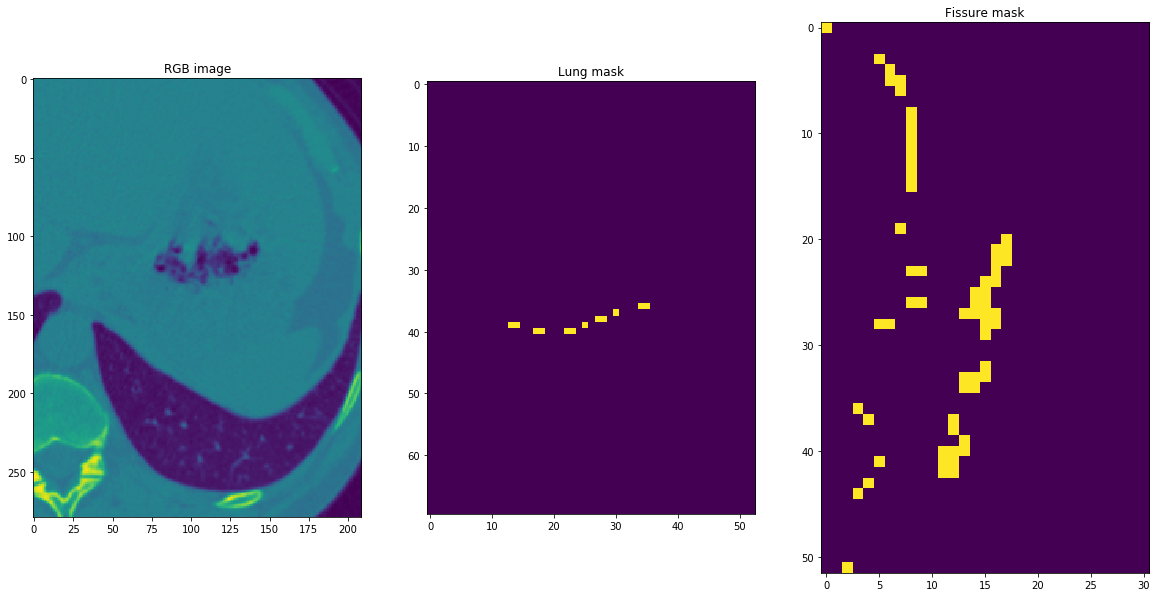

Completeness:  100.0


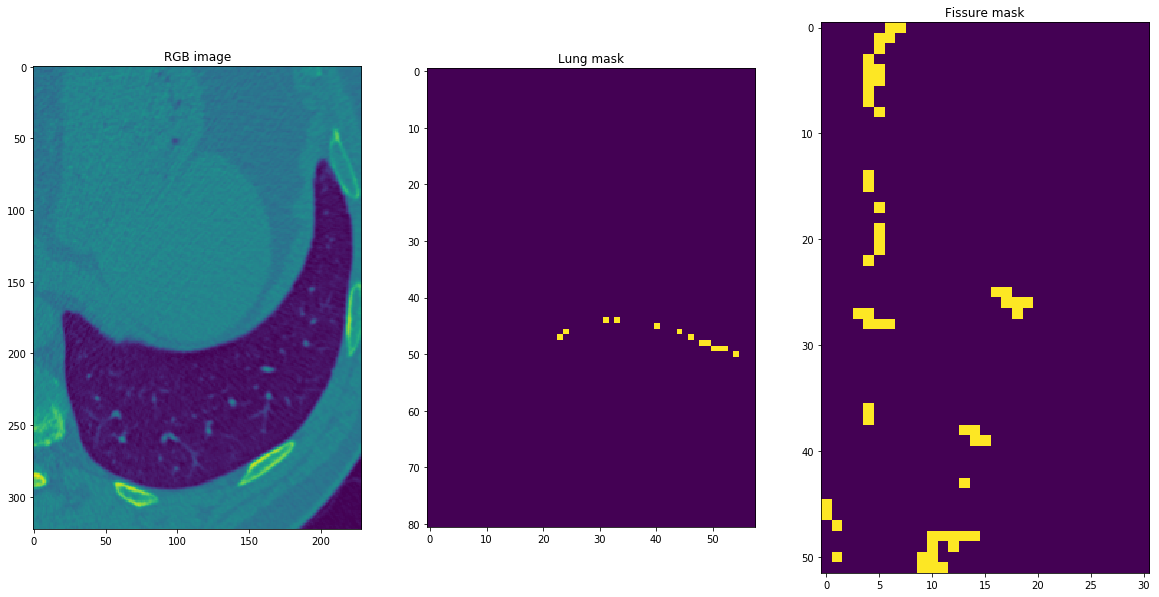

Completeness:  99.9444


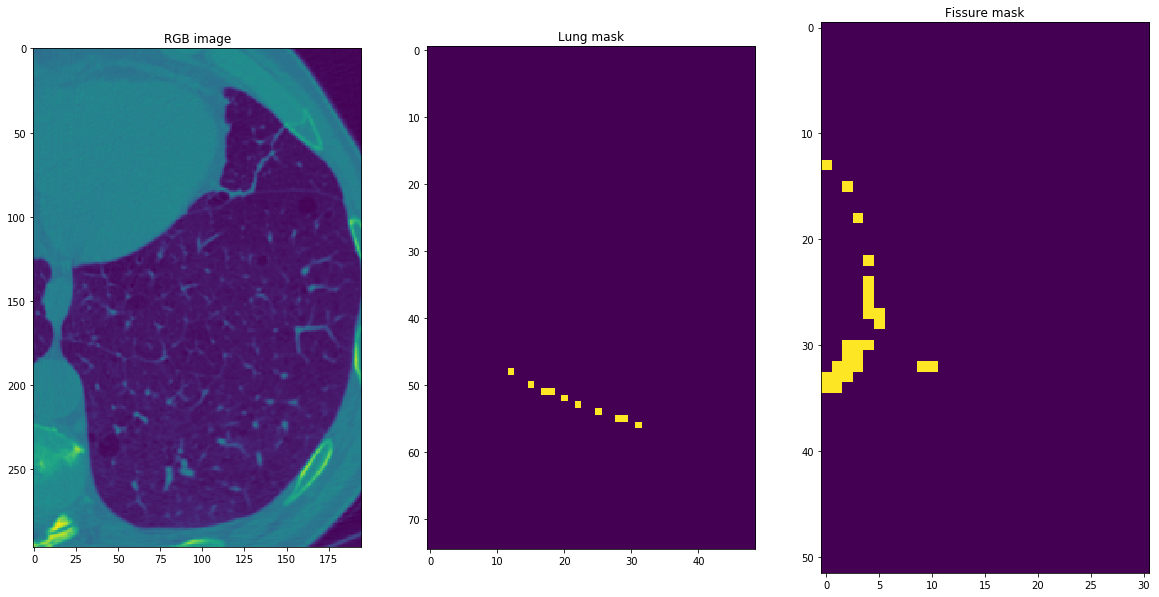

Completeness:  100.0


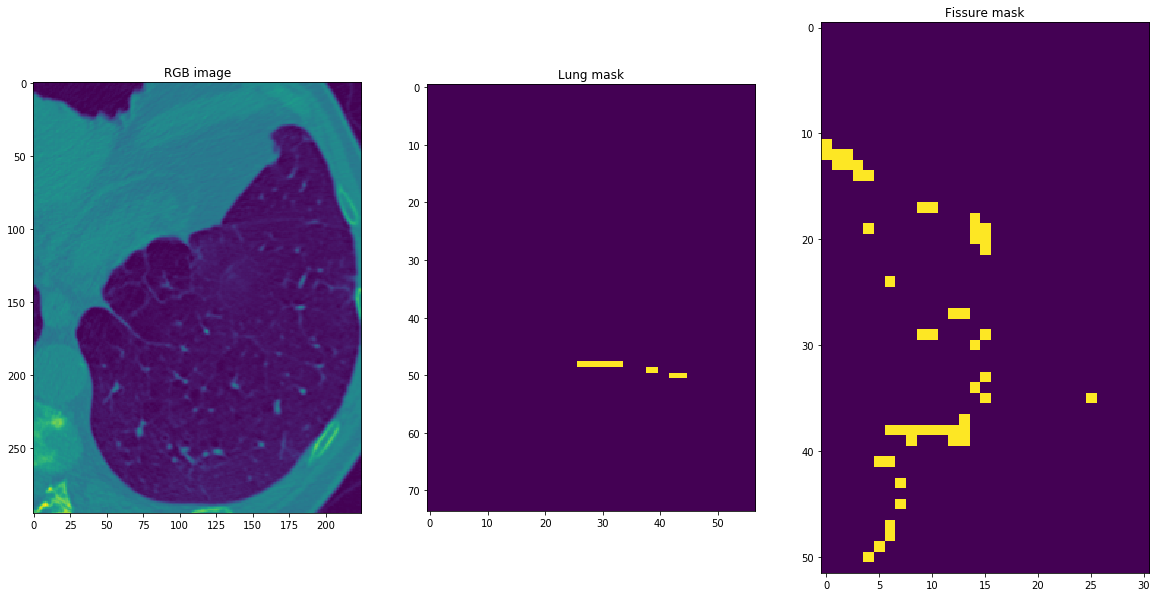

Completeness:  99.8726


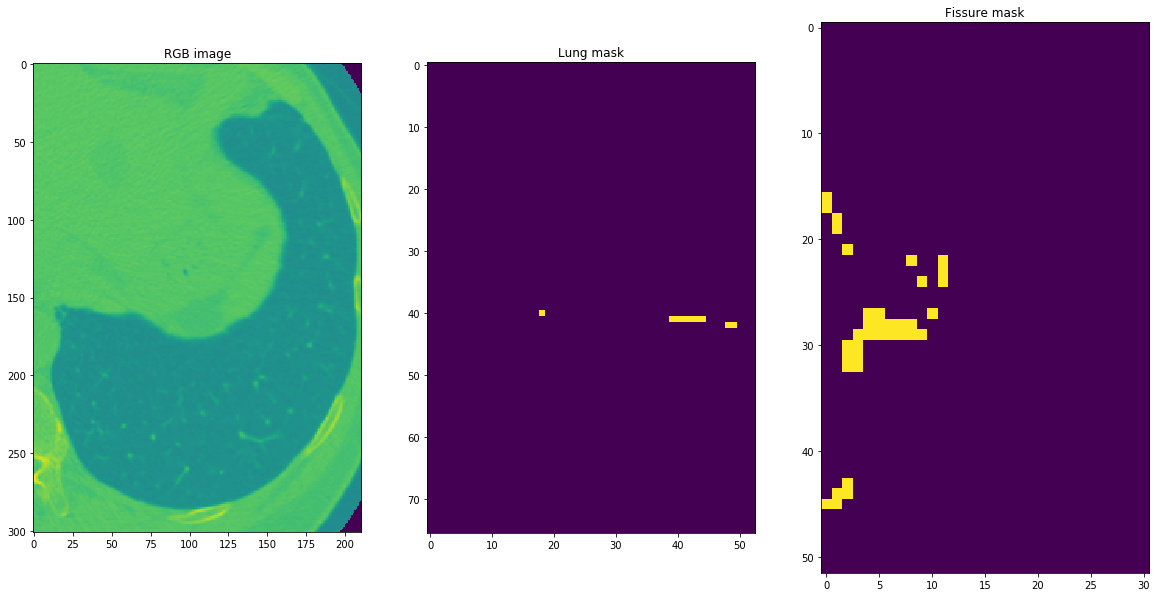

Completeness:  99.0007


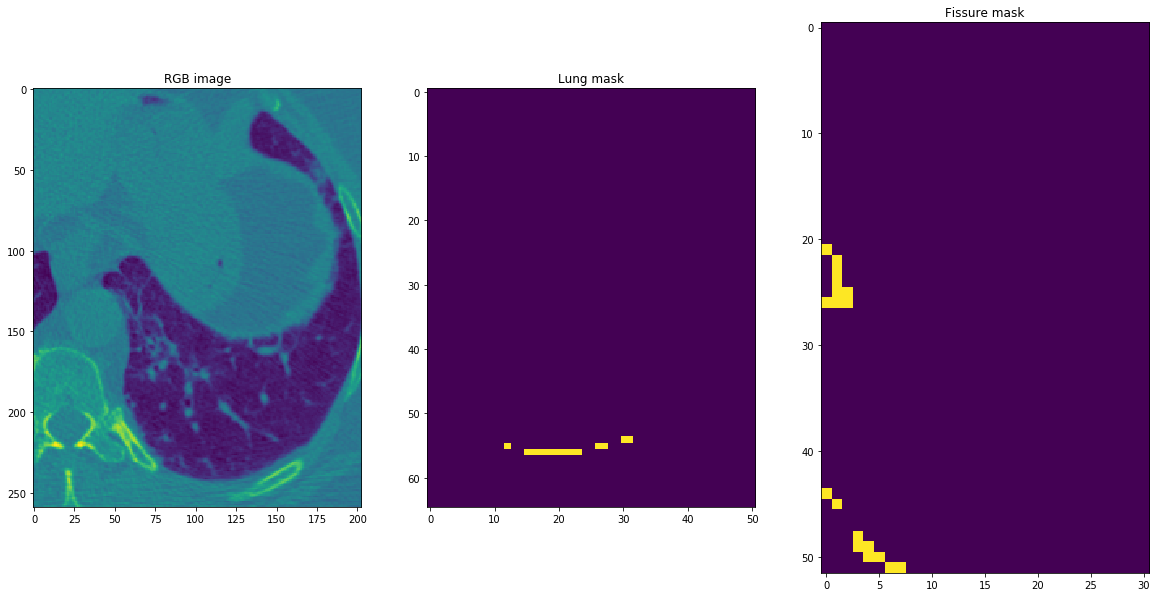

Completeness:  100.0


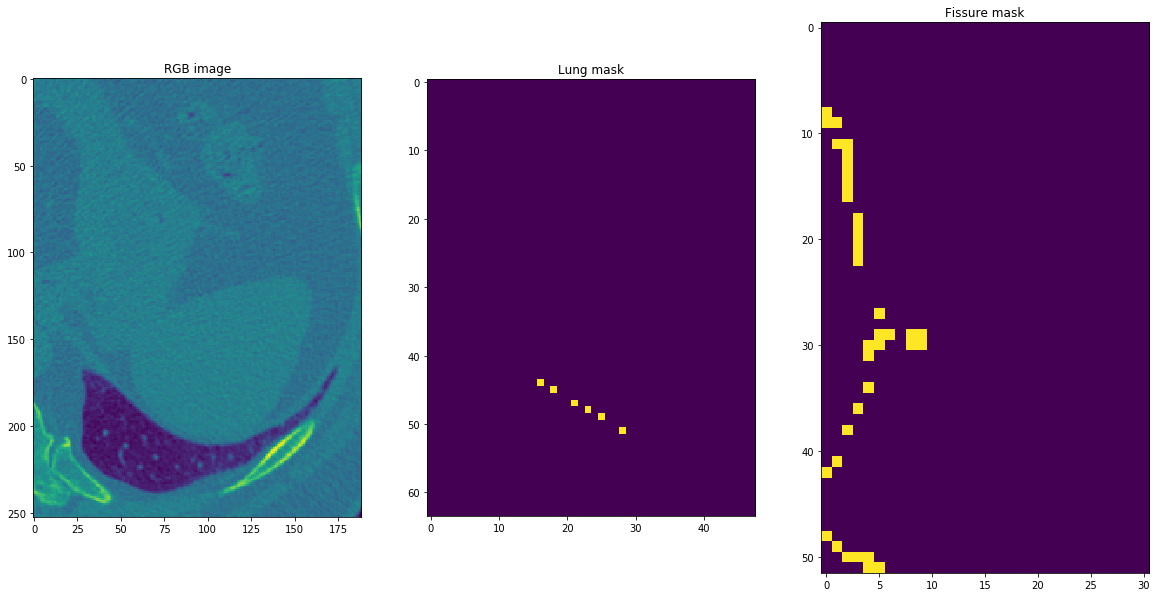

Completeness:  100.0


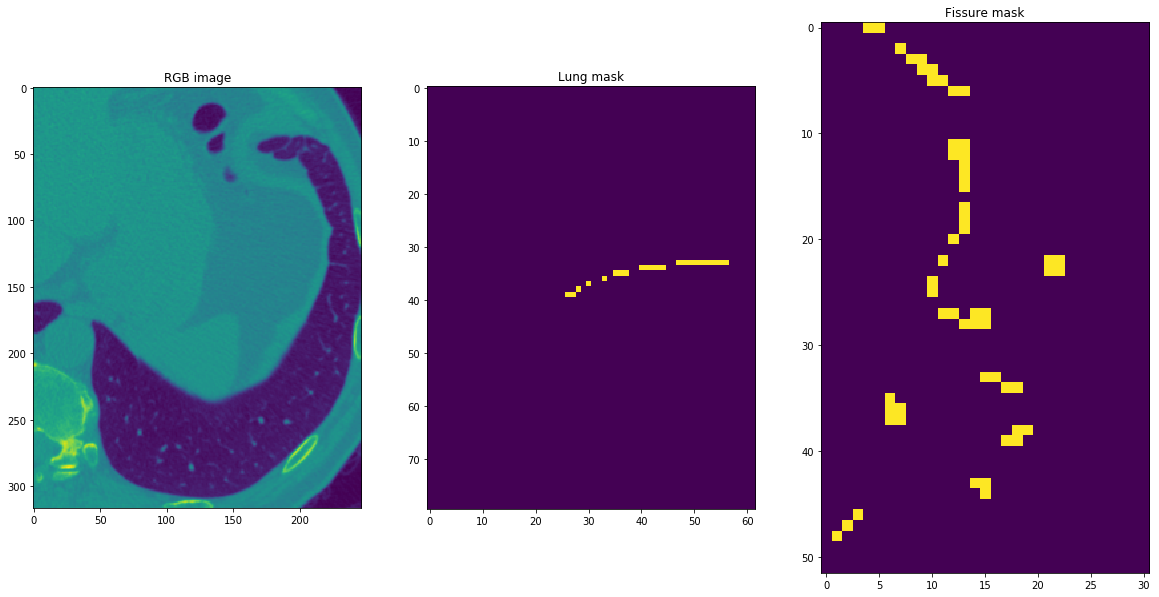

Completeness:  99.8082


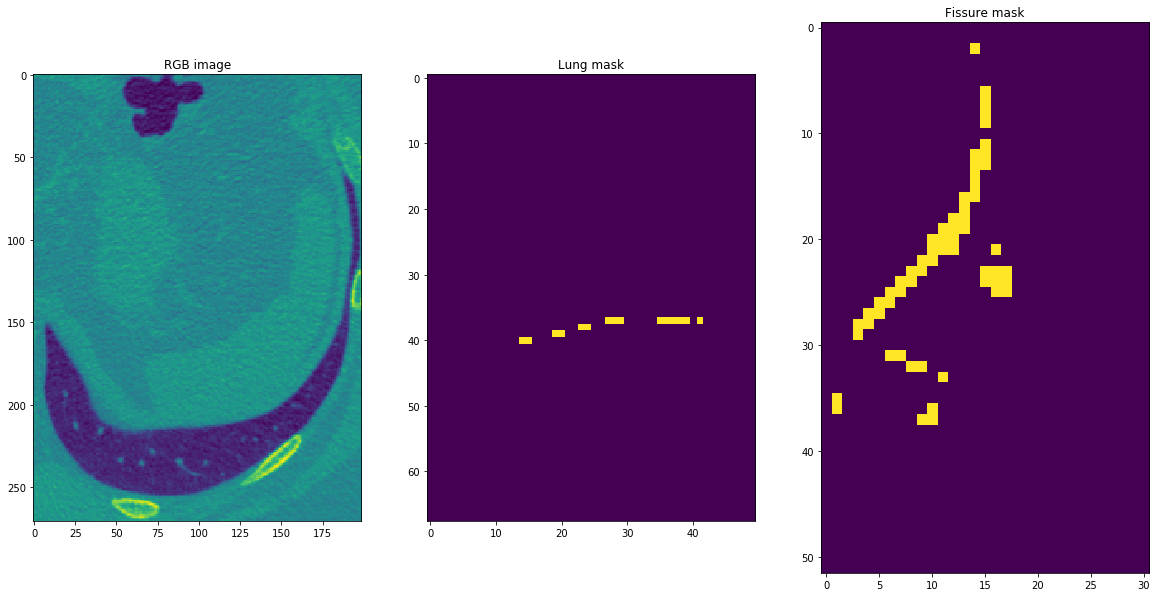

Completeness:  99.5163


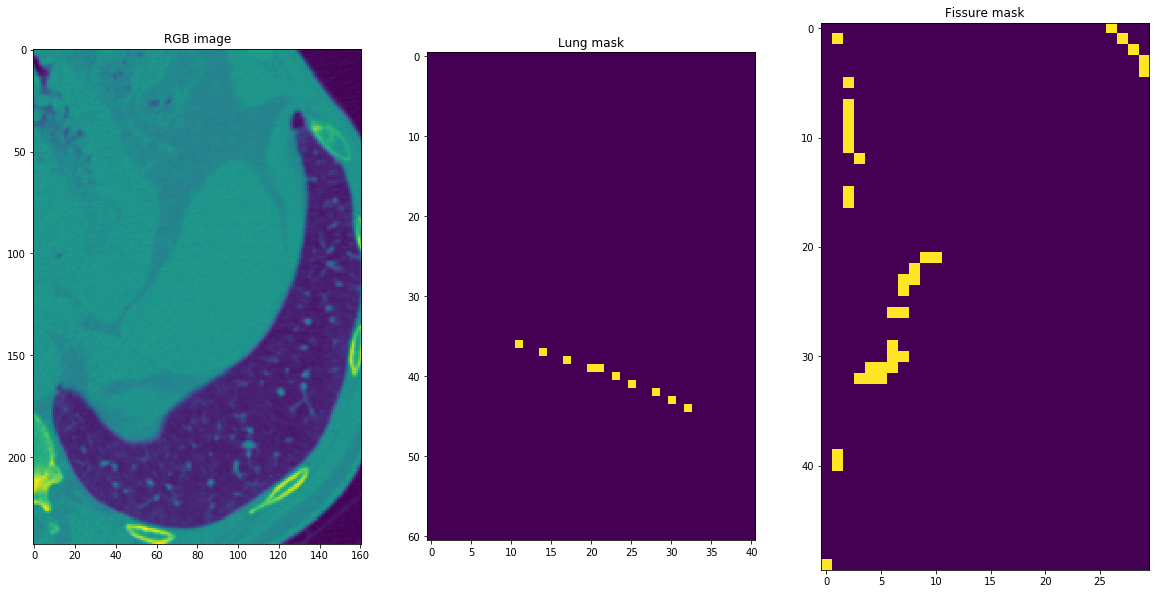

Completeness:  99.9173


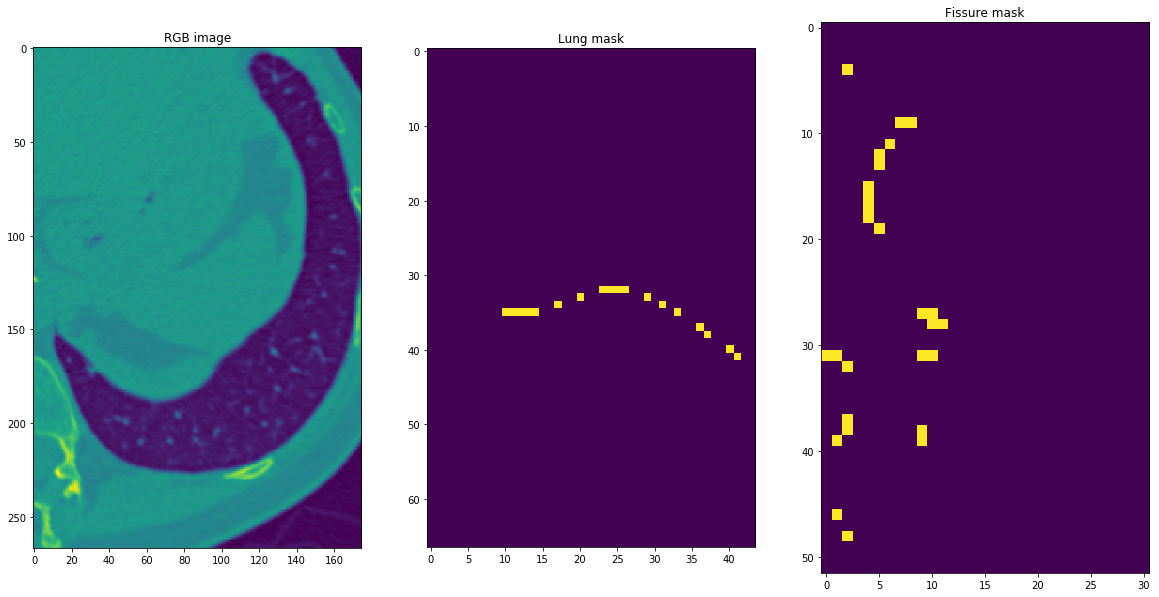

Completeness:  99.8645


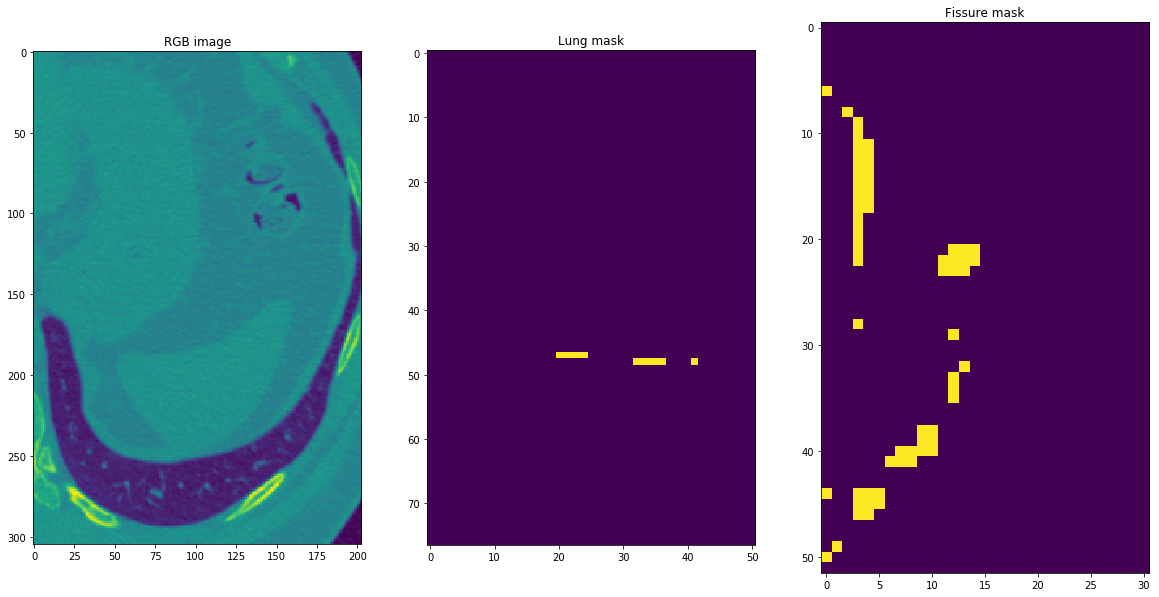

Completeness:  99.8706


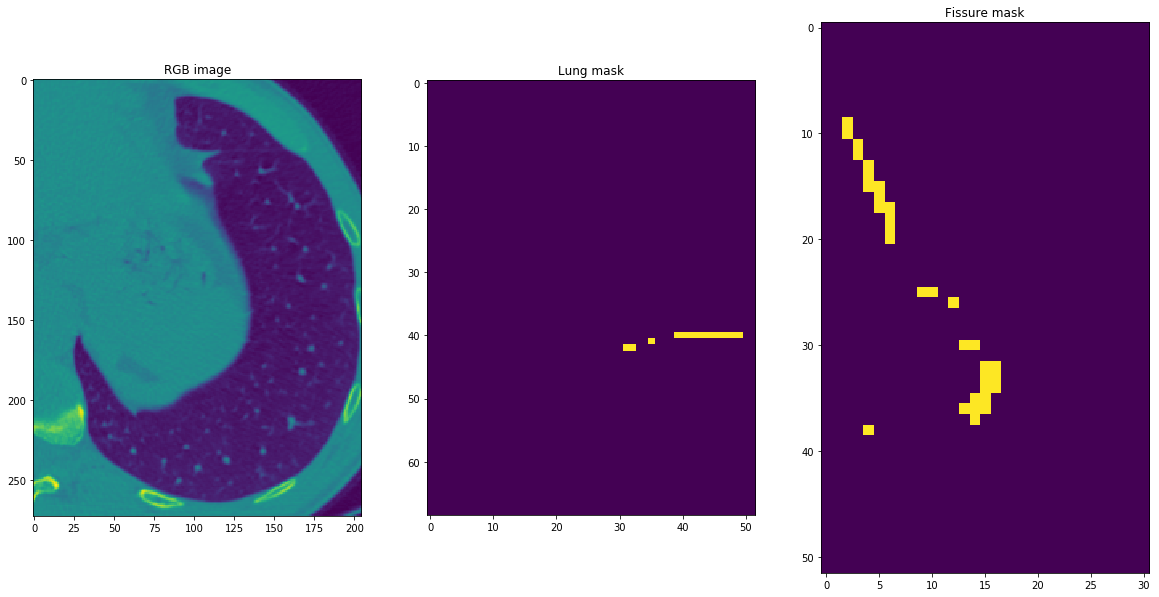

Completeness:  100.0


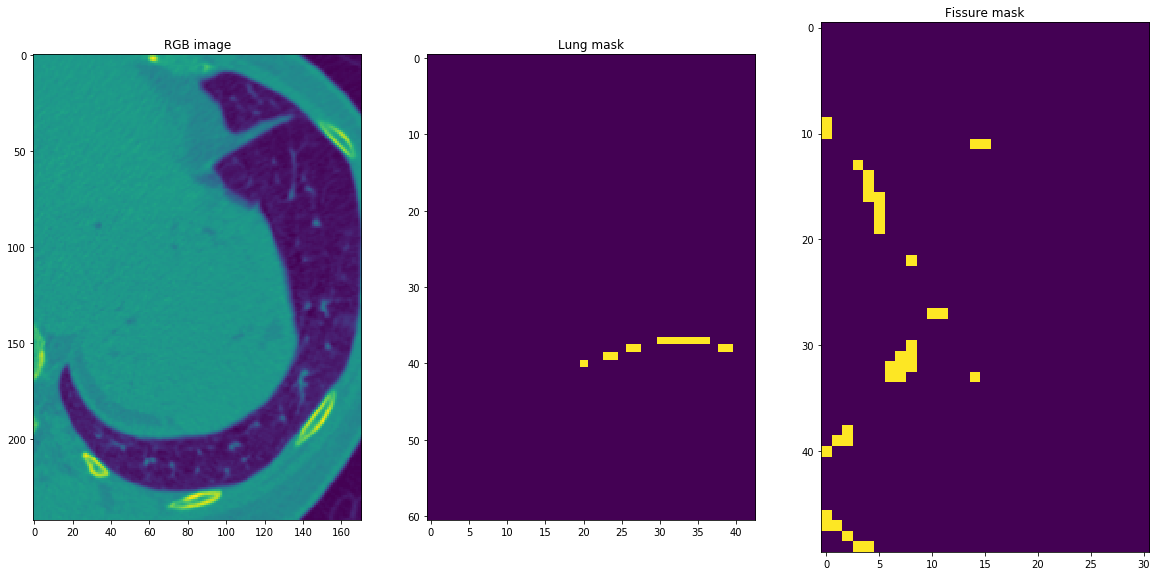

Completeness:  100.0


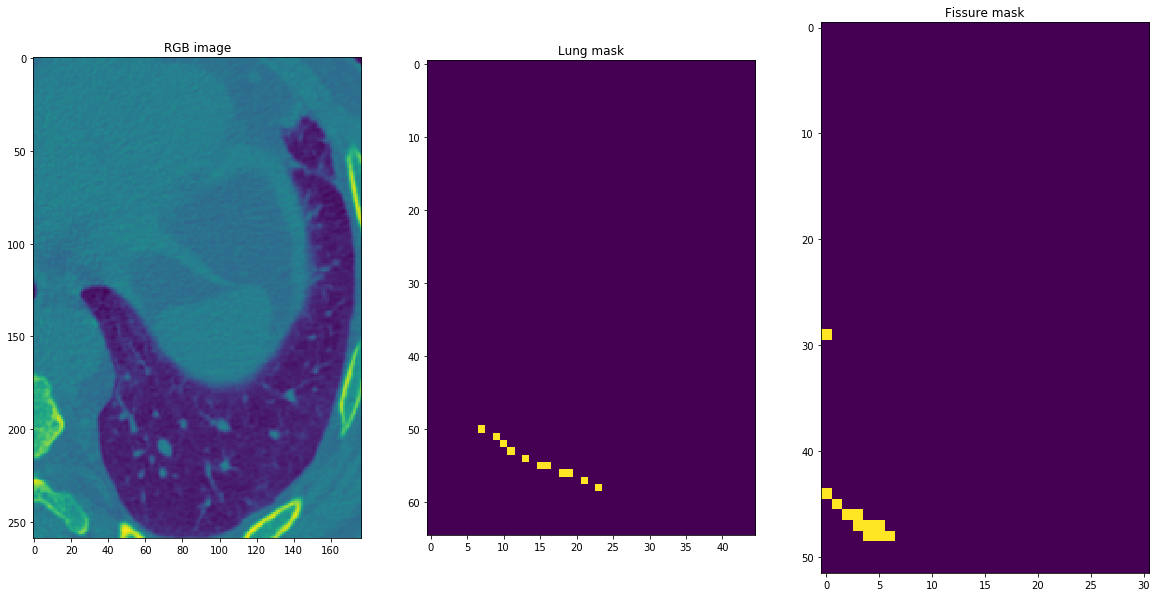

Completeness:  100.0


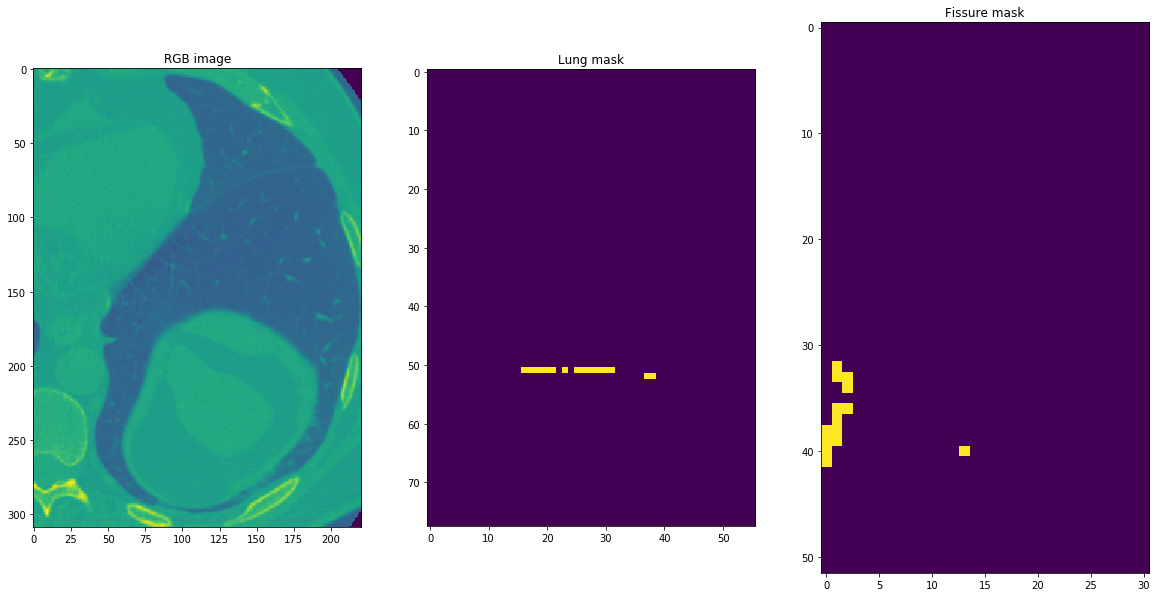

In [60]:
for i in range(len(output)):
    img = readImg(data['image'][i+80])[70,:,:]
    lbl_original = downscale(readImg(data['fissuremask'][i+80]), 4)[70,:,:]
    lbl_predict = output[i][0,70,:,:] > 0.5
    print("Completeness: ", data['completeness'][i+80])
    show_image(img, lbl_original, lbl_predict)